In [14]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import gmaps
import datetime

from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

#%matplotlib notebook 

In [2]:
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)

lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        if len(cities) < 501: # if len(cities) < 5 for test 429 error code
            cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

501

In [4]:
#define variables
base_url = "http://api.openweathermap.org/data/2.5/weather?appid=" + weather_api_key + "&units=imperial"
record_counter = 0
set_counter = 1

#define objects
new_cities = [] #for 404 weather info not found error 
country = []
lat = []
lng = [] 
date = [] 
cloudiness = [] 
humidity = []
max_temp = [] 
wind = []
 
print(f"Beginning Data Retrieval \n-----------------------------") 

for city in cities:
    query_url = base_url + "&q=" + city
    resp_data = requests.get(query_url).json() #request weather data   

    if record_counter < 50:
        record_counter += 1
    else:
        record_counter = 0 
        set_counter += 1  
        
    print('Processing Record {} of Set {} | {}'.format(record_counter, set_counter, city)) 
    
    try: 
        new_cities.append(resp_data['name']) #city
        country.append(resp_data['sys']['country'])
        lat.append(resp_data['coord']['lat'])
        lng.append(resp_data['coord']['lon']) 
        date.append(datetime.date.fromtimestamp(resp_data['dt'])) #convert timestamp     
        cloudiness.append(resp_data['clouds']['all'])
        humidity.append(resp_data['main']['humidity'])
        max_temp.append(resp_data['main']['temp_max']) 
        wind.append(resp_data['wind']['speed']) 
    except:
        print("404 City Not Found!")
        pass
    

Beginning Data Retrieval 
-----------------------------
Processing Record 1 of Set 1 | ust-nera
Processing Record 2 of Set 1 | barentsburg
404 City Not Found!
Processing Record 3 of Set 1 | narsaq
Processing Record 4 of Set 1 | mahebourg
Processing Record 5 of Set 1 | ushuaia
Processing Record 6 of Set 1 | ochamchira
Processing Record 7 of Set 1 | geraldton
Processing Record 8 of Set 1 | bengkulu
Processing Record 9 of Set 1 | nizhneyansk
404 City Not Found!
Processing Record 10 of Set 1 | pemangkat
Processing Record 11 of Set 1 | utiroa
404 City Not Found!
Processing Record 12 of Set 1 | lewisporte
Processing Record 13 of Set 1 | yellowknife
Processing Record 14 of Set 1 | rauma
Processing Record 15 of Set 1 | tahta
Processing Record 16 of Set 1 | ribeira grande
Processing Record 17 of Set 1 | port alfred
Processing Record 18 of Set 1 | orlik
Processing Record 19 of Set 1 | palembang
Processing Record 20 of Set 1 | rio grande
Processing Record 21 of Set 1 | drabiv
Processing Record 22

Processing Record 42 of Set 4 | kedgwick
Processing Record 43 of Set 4 | karasjok
Processing Record 44 of Set 4 | ambon
Processing Record 45 of Set 4 | gurskoye
404 City Not Found!
Processing Record 46 of Set 4 | lebu
Processing Record 47 of Set 4 | barcelos
Processing Record 48 of Set 4 | touros
Processing Record 49 of Set 4 | torbay
Processing Record 50 of Set 4 | cherskiy
Processing Record 0 of Set 5 | severo-kurilsk
Processing Record 1 of Set 5 | deputatskiy
Processing Record 2 of Set 5 | vaini
Processing Record 3 of Set 5 | istria
Processing Record 4 of Set 5 | katsuura
Processing Record 5 of Set 5 | tsihombe
404 City Not Found!
Processing Record 6 of Set 5 | kamenskoye
404 City Not Found!
Processing Record 7 of Set 5 | caravelas
Processing Record 8 of Set 5 | bayir
Processing Record 9 of Set 5 | shelburne
Processing Record 10 of Set 5 | bathsheba
Processing Record 11 of Set 5 | zhezkazgan
Processing Record 12 of Set 5 | tuktoyaktuk
Processing Record 13 of Set 5 | saint-joseph
Pro

Processing Record 32 of Set 8 | ati
Processing Record 33 of Set 8 | haibowan
404 City Not Found!
Processing Record 34 of Set 8 | flagstaff
Processing Record 35 of Set 8 | jinka
Processing Record 36 of Set 8 | bolama
Processing Record 37 of Set 8 | petrov val
Processing Record 38 of Set 8 | awjilah
Processing Record 39 of Set 8 | udine
Processing Record 40 of Set 8 | mys shmidta
404 City Not Found!
Processing Record 41 of Set 8 | coahuayana
Processing Record 42 of Set 8 | lulea
Processing Record 43 of Set 8 | upernavik
Processing Record 44 of Set 8 | sao filipe
Processing Record 45 of Set 8 | trinidad
Processing Record 46 of Set 8 | coquimbo
Processing Record 47 of Set 8 | ouro fino
Processing Record 48 of Set 8 | zeya
Processing Record 49 of Set 8 | carai
Processing Record 50 of Set 8 | ilulissat
Processing Record 0 of Set 9 | middleton
Processing Record 1 of Set 9 | aswan
Processing Record 2 of Set 9 | megion
Processing Record 3 of Set 9 | mountain home
Processing Record 4 of Set 9 | 

### Convert Raw Data to DataFrame

In [5]:
weather = { "City": new_cities, "Country": country, "Latitude": lat, "Longitude": lng, 
            "Date": date, "Cloudiness": cloudiness, "Humidity": humidity, "MaxTemp": max_temp, "WindSpeed": wind }
 
#weather_df = pd.DataFrame.from_dict(weather, orient='index') 
weather_df = pd.DataFrame(weather)
weather_df.head()

,City,Country,Latitude,Longitude,Date,Cloudiness,Humidity,MaxTemp,WindSpeed
0,Ust-Nera,RU,64.5667,143.2000,2021-02-07,81,81,-3.86,9.26
1,Narsaq,GL,60.9167,-46.0500,2021-02-07,20,28,39.20,39.12
2,Mahébourg,MU,-20.4081,57.7000,2021-02-07,40,78,80.60,8.05
3,Ushuaia,AR,-54.8000,-68.3000,2021-02-07,75,87,51.80,5.75
4,Ochamchira,GE,42.7121,41.4721,2021-02-07,100,75,50.52,4.27


In [6]:
#export city data frame into csv
weather_df.to_csv("../Output/cities.csv", encoding = "UTF-8", index = False, header = True) 

In [7]:
# Inspect the data and remove the cities where the humidity > 100%.
humidity_df = weather_df['Humidity'].describe()
humidity_df

count    458.000000
mean      73.181223
std       19.453696
min       15.000000
25%       63.000000
50%       77.500000
75%       87.000000
max      100.000000
Name: Humidity, dtype: float64

In [8]:
#  Get the indices of cities that have humidity over 100%.


In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data

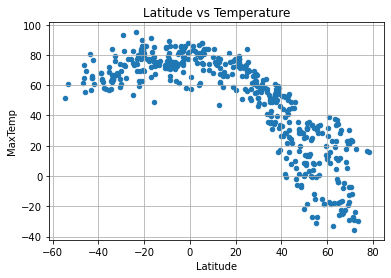

In [10]:
#Latitude vs. Temperature Plot
weather_df.plot(kind = "scatter", x = "Latitude", y = "MaxTemp", title = "Latitude vs Temperature").grid() 
plt.savefig("../Output/LatitudeVSTemperature.png")

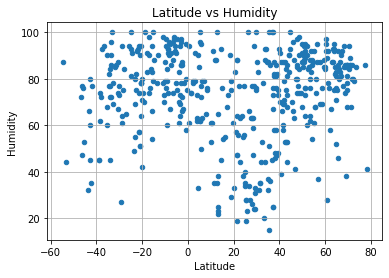

In [11]:
#Latitude vs. Humidity Plot
weather_df.plot(kind = "scatter", x = "Latitude", y = "Humidity", title = "Latitude vs Humidity").grid() 
plt.savefig("../Output/LatitudeVSHumidity.png")

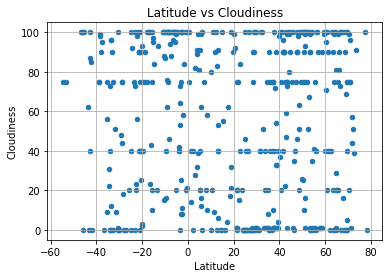

In [12]:
#Latitude vs. Cloudiness Plot
weather_df.plot(kind = "scatter", x = "Latitude", y = "Cloudiness", title = "Latitude vs Cloudiness").grid() 
plt.savefig("../Output/LatitudeVSCloudiness.png")

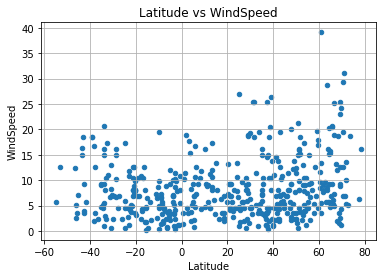

In [13]:
#Latitude vs. Wind Speed Plot
weather_df.plot(kind = "scatter", x = "Latitude", y = "WindSpeed", title = "Latitude vs WindSpeed").grid() 
plt.savefig("../Output/LatitudevsWindSpeed.png")

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression